# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [5]:
pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 5.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


데이터 살펴보기

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/이어드림강의/2022-04-21(Toy)/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [5]:
df.info() # 형식적인 결측치는 일단 없는 것으로 확인.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [18]:
df.nunique() # 자세하게 알아보기 위해 고윳값 개수를 확인 CHAS와 CAT. MEDV 는 1과 0으로만 구성되어있어서 2이고, 나머진 크게 문제가 없어보임.

CRIM         504
ZN            26
INDUS         76
CHAS           2
NOX           81
RM           446
AGE          356
DIS          412
RAD            9
TAX           66
PTRATIO       46
B            357
LSTAT        455
MEDV         229
CAT. MEDV      2
dtype: int64

## 데이터 분포 확인하기

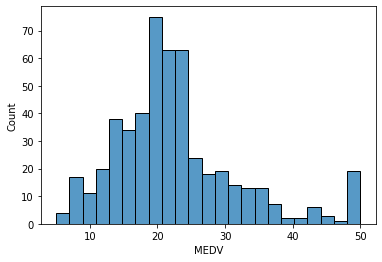

In [20]:
plt.figure()
sns.histplot( data=df, x="MEDV") # MEDV의 분포를 알아보기 위해 히스토그램으로 확인, 20000달러 주변에 많이 분포되어 있고 다만 50000달러 지표가 튀는 것 같아 조사가 필요해보임.
plt.show() 

In [24]:
df.loc[df["MEDV"]>=50]  # MEDV가 50.0 초과한 지표가 없기 때문에 그 이상은 그냥 다 50.0으로 처리한 것으로 판단.
# 범죄율이 높음에도 불구하고 집값이 높은 경우는 대부분 INDUS지수가 높은 지역,즉 상권지역일 가능성이 높다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0,1
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0,1
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,1
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0,1
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0,1
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0,1
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0,1
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0,1
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0,1
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0,1


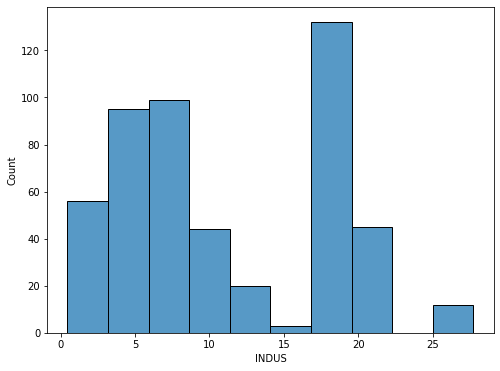

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="INDUS") #15를 기준으로 데이터 분포 군집이 있으므로 15이상을 상권지역이라고 판단.
plt.show()

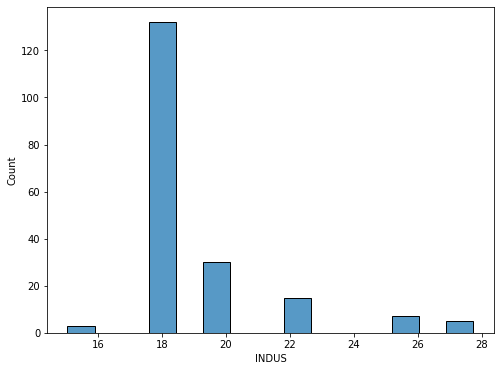

In [37]:
df_high_INDUS = df.loc[ df["INDUS"]>=15]
plt.figure(figsize=(8,6))
sns.histplot(data=df_high_INDUS,x="INDUS", bins=15) # 지표가 18에 대부분 몰려있음. 
plt.show()

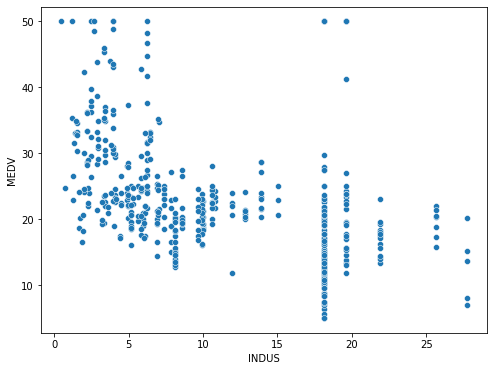

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="INDUS",y="MEDV") # INDUS와 MEDV 지표의 산포도를 그려봤는데 음의 상관관계가 있다는 것을 볼 수 있지만 유의미한 수치까지는 아닌 듯함.
plt.show()

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

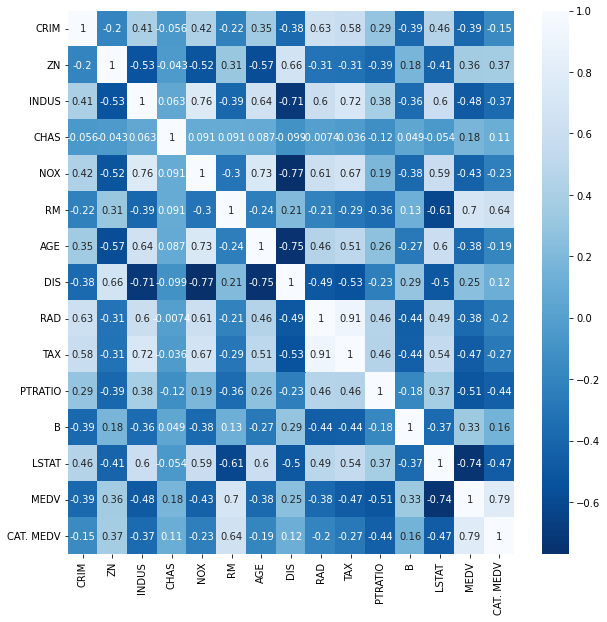

In [35]:
plt.figure(figsize=(10,10))
df_corr=df.corr() # corr() 메서드로 df의 상관관계 계수를 df_corr에 저장

sns.heatmap(data=df_corr, annot=True, cmap="Blues_r") # seaborn heatmap으로 df_cprr()를 시각화, annot을 True로 주어서 계수 눈으로 확인. cmap옵션으로 단색으로 설정
plt.show()

##MEDV와 RM LSTAT 관계
MEDV 지표와 상관관계가 높은 것은 RM과 LSTAT가 일단 보인다. CAT. MEDV 는 사실 MEDV에서 파생된 2차지표계 유의미한 상관계수는 아닌듯 하다. 그 다음으로 눈여겨 볼것은 PTRATIO인데 학생/교사 비율이라 이 비율이 낮다는 것은 교사수, 즉 교육자 수가 많다는 것이다. 유의미한 데이터가 될 수 있다.


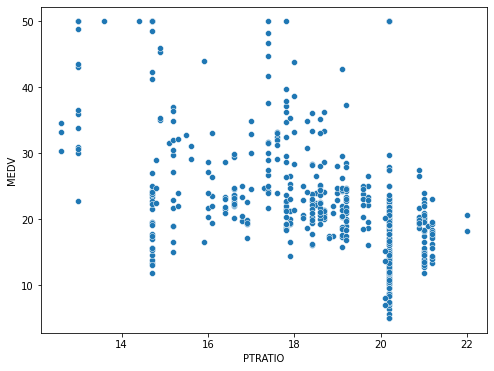

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="PTRATIO", y="MEDV") # 분명하지 않지만 어느 정도 음의 상관관계가 있지만 크게 참고할 만한 정도는 아닌 것으로 판단. 특히 다른 산포도에서도 그렇듯이 같은 값을 가지는 X축 데이터가 많다.
plt.show()

##상권과 비상권
생각해보면 상권 지역과 비상권 지역을 나눠야 할듯 싶다. 상권지역은 사실 범죄율도 높고 하위계층도 많이 있지만 그만큼 여러 상권이 밀집한 지역이라 집값이 비쌀 수 있다. 반면에 비상권 지역에서 주택의 가격이 높다는 것은 상권지역의 조건과 다른 조건들이 충족되어야 하기 때문에 이렇게 섞여서 한꺼번에 계산을 하면 어떤 조건들이 주택의 가격에 영향을 주는지 모호할 수 있다고 생각했다.


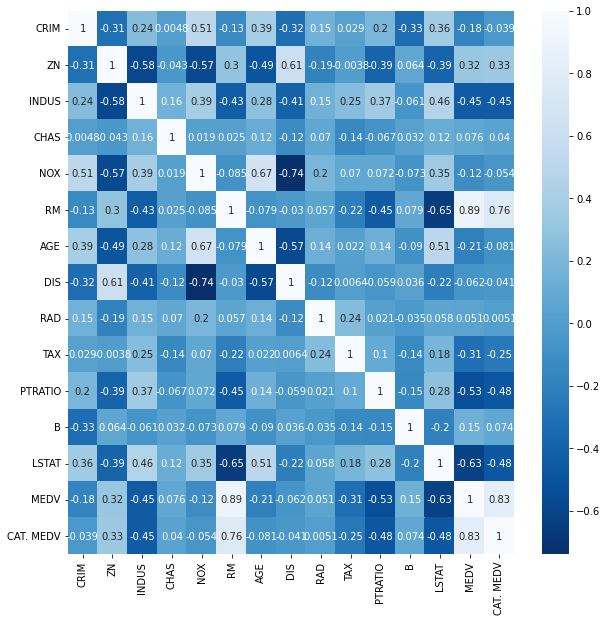

In [40]:
# 비상권 지역 상관계수

df_low_INDUS= df.loc[df['INDUS']<15]
df_low_INDUS

plt.figure(figsize=(10,10))
df_low_INDUS_corr=df_low_INDUS.corr() 

sns.heatmap(data=df_low_INDUS_corr, annot=True, cmap="Blues_r") 
plt.show()

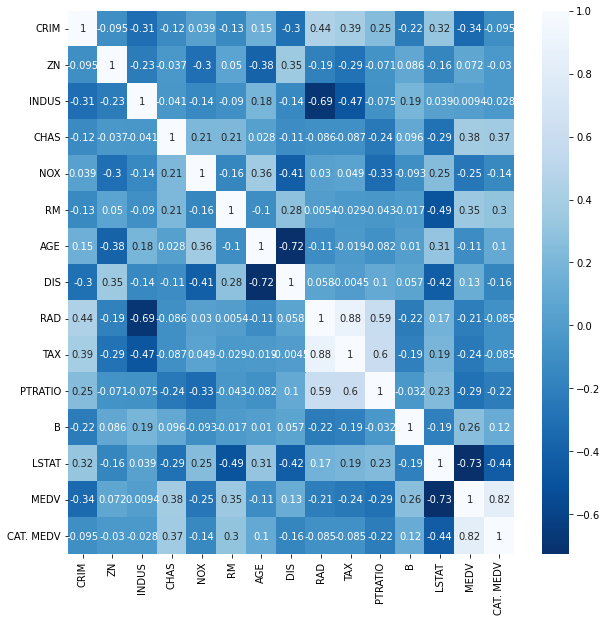

In [42]:
# 상권지역 상관계수

df_high_INDUS= df.loc[df['INDUS']>=15]
df_high_INDUS

plt.figure(figsize=(10,10))
df_high_INDUS_corr=df_high_INDUS.corr() 

sns.heatmap(data=df_high_INDUS_corr, annot=True, cmap="Blues_r") 
plt.show()

###소결론
상권과 비상권으로 나누었을 때의 가장 큰 차이점은 RM지표의 상관관계였다. 비상권 지역일수록 RM(평균 방의 개수)가 큰 상관관계를 보이고 있고 상권지역은 방의 개수랑 상관이 없었다.

## CAT. MEDV
- 이제는 CAT. MEDV가 1일 때와 0일 때를 구분해서 상관관계를 살펴보자.

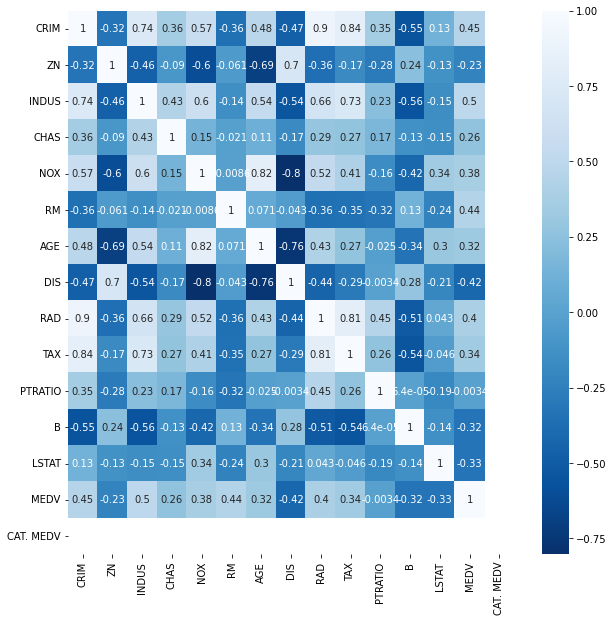

In [8]:
# CAT. MEDV가 1일 때
df_cat_1= df.loc[df["CAT. MEDV"]==1]
df_cat_1

plt.figure(figsize=(10,10))
df_cat_1_corr=df_cat_1.corr() 

sns.heatmap(data=df_cat_1_corr, annot=True, cmap="Blues_r") 
plt.show()

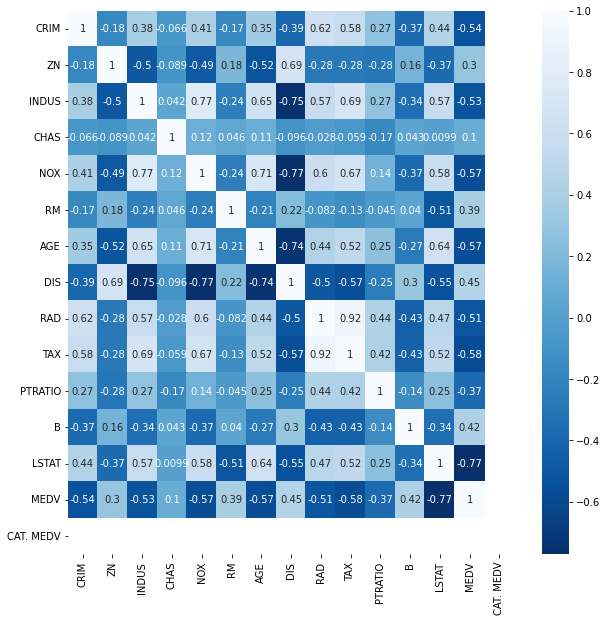

In [9]:
# CAT. MEDV가 0 일 때
df_cat_0= df.loc[df["CAT. MEDV"]==0]
df_cat_0

plt.figure(figsize=(10,10))
df_cat_0_corr=df_cat_0.corr() 

sns.heatmap(data=df_cat_0_corr, annot=True, cmap="Blues_r") 
plt.show()

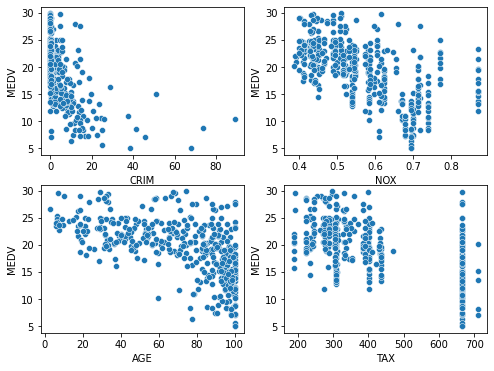

In [19]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.scatterplot(data= df_cat_0, x="CRIM", y="MEDV")

plt.subplot(2,2,2)
sns.scatterplot(data= df_cat_0, x="NOX", y="MEDV")

plt.subplot(2,2,3)
sns.scatterplot(data= df_cat_0, x="AGE", y="MEDV")

plt.subplot(2,2,4)
sns.scatterplot(data= df_cat_0, x="TAX", y="MEDV")



plt.show()

###소결론
CAT. MEDV가 1일 때는 어떤 지표에도 큰 상관관계를 의미하는 것은 없었지만, 0일 때 여러가지 지표가 나타났다. 다만 TAX에서는 어느 구간의 값을 일정한 값으로 설정을 해놓은 부분이 있어서 실제 상관계수 수치와는 별도로 뚜렷한 음의 상관관계는 나타나지 않는 것으로 보인다. 

## 결론
- 상권과 비상권으로 나눴을 때는 RM지표에 대한 차이가 있었고
- CAT. MEDV를 기준으로 나누어 분석해봤을 때는 30000달러 미만의 주택의 분포에선 4개정도의 유의미한 상관관계를 알 수 있었다.


<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>